<a href="https://colab.research.google.com/github/AMS-Anish/PI-Controller-Tuning/blob/main/KP_KI_GOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tfest

# Create sample input-output data arrays
# Assuming you have arrays of input and output data
# For demonstration purposes, let's create some synthetic data
t = np.linspace(0, 10, 100)  # Time vector
inputs = np.sin(t)  # Example input signal (sine wave)
# Example output signal (response of a second-order system to the sine wave)
outputs = np.sin(t) + 0.2*np.random.randn(len(t))

# Print shapes and lengths of input and output arrays
print("Input shape:", inputs.shape)
print("Output shape:", outputs.shape)
print("Input length:", len(inputs))
print("Output length:", len(outputs))

# Put input and output data into a DataFrame (similar to Excel sheet)
data = pd.DataFrame({'Input': inputs, 'Output': outputs})

# Estimate transfer function model
sys_order = 2  # Assuming second-order system
sys = tfest.tfest([inputs, outputs], sys_order)
sys.estimate(1, 1, time=1, l1=0.1)

# Get the estimated transfer function
estimated_tf = sys.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Plot input-output data
plt.plot(t, inputs, label='Input')
plt.plot(t, outputs, label='Output')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Input-Output Data')
plt.grid(True)
plt.legend()
plt.show()


Input shape: (100,)
Output shape: (100,)
Input length: 100
Output length: 100


TypeError: len() of unsized object

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tfest

# Create sample input-output data arrays
# Assuming you have arrays of input and output data
# For demonstration purposes, let's create some synthetic data
t = np.linspace(0, 10, 100)  # Time vector
inputs = np.sin(t)  # Example input signal (sine wave)
# Example output signal (response of a second-order system to the sine wave)
outputs = np.sin(t) + 0.2*np.random.randn(len(t))

# Put input and output data into a DataFrame (similar to Excel sheet)
data = pd.DataFrame({'Input': inputs, 'Output': outputs})

# Estimate transfer function model
sys_order = 2  # Assuming second-order system
sys = tfest.tfest([inputs, outputs], sys_order)
sys.estimate(1, 1, time=1, l1=0.1)  # Use None for default value or specify a scalar value

# Get the estimated transfer function
estimated_tf = sys.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Plot input-output data
plt.plot(t, inputs, label='Input')
plt.plot(t, outputs, label='Output')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Input-Output Data')
plt.grid(True)
plt.legend()
plt.show()


TypeError: len() of unsized object

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tfest

# Load input-output data from Excel sheet
file_path = "/content/Test15.xlsx"
data = pd.read_excel(file_path)

# Extract input and output columns from the DataFrame
inputs = data.iloc[:, 1].values
outputs = data.iloc[:, 2].values

# Estimate transfer function model
sys_order = 2  # Example: Assuming second-order system
sys = tfest.tfest([inputs, outputs], sys_order)

# Display estimated transfer function
'''transfer_function = sys.transfer_function_H
print("Estimated Transfer Function:")
print(transfer_function)'''

sys.estimate(2, 3, time=1, l1=0.1)  # Use None for default value or specify a scalar value

# Get the estimated transfer function
estimated_tf = sys.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Plot step response of the estimated transfer function
# t, y = step_response(sys)
# plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Output')
plt.title('Step Response of Estimated Transfer Function')
plt.grid(True)
plt.show()


TypeError: len() of unsized object

In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
pip install step_response

ERROR: Could not find a version that satisfies the requirement step_response (from versions: none)
ERROR: No matching distribution found for step_response


In [ ]:
pip install tfest

  Preparing metadata (setup.py) ... done
  Created wheel for tfest: filename=tfest-0.2.3-py3-none-any.whl size=3515 sha256=461081d8841c27711196fa22cc9e00b53b580aea6e90d97919d0e0ba9cd8f0cd
  Stored in directory: /root/.cache/pip/wheels/ec/a6/45/845c7bdc965555f31f0ae0a3b3cf121c5fb8cfefb58e00e1e2
Successfully built tfest


Optimization terminated successfully.
         Current function value: 955068337.439003
         Iterations: 217
         Function evaluations: 399
Estimated Transfer Function:
TransferFunctionContinuous(
array([0.07665402, 0.88700255, 1.32601849, 1.36863454]),
array([1.        , 0.74182412, 0.19839084, 1.01420465, 0.01399389]),
dt: None
)


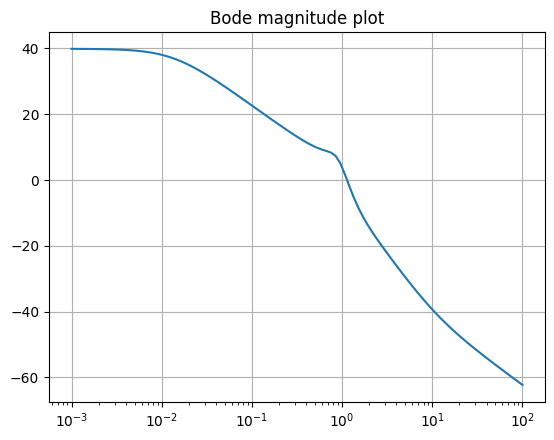

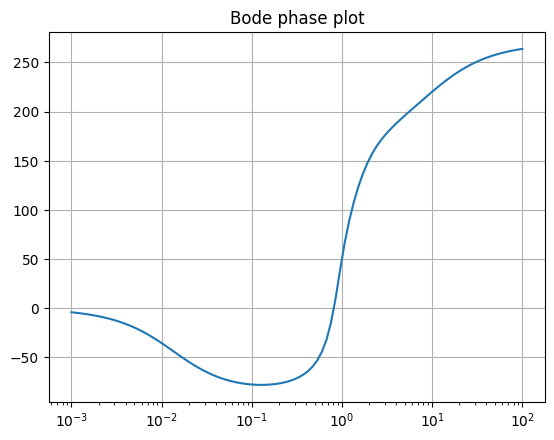

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tfest
import pandas as pd

# Load data from Excel file
data = pd.read_excel('/content/Test13.xlsx')

# Get input-output data from the first and second column of the Excel sheet
u = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Estimate transfer function from input-output data
te = tfest.tfest(u, y)

# Estimate transfer function parameters
te.estimate(3, 4, time=1, l1=0.1)

# Get the estimated transfer function
estimated_tf = te.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Plot the Bode diagram of the estimated transfer function
te.plot_bode()
plt.show()


Optimization terminated successfully.
         Current function value: 955068273.247352
         Iterations: 164
         Function evaluations: 298
Estimated Transfer Function:
TransferFunctionContinuous(
array([ 2.1503141 , -0.23035551]),
array([1.        , 0.01090507, 0.9921098 ]),
dt: None
)


AttributeError: module 'control' has no attribute 'pidtune'

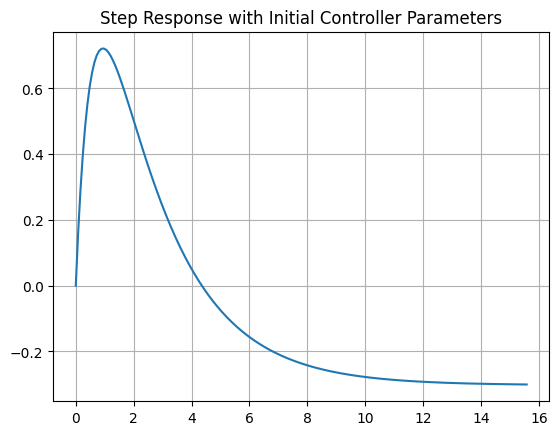

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tfest
from scipy.optimize import minimize
import control

# Define the path to your Excel file
file_path = '/content/Test13.xlsx'

# Load data from Excel file
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

# Get input-output data from the first and second column of the Excel sheet
u = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Estimate the transfer function from input-output data
te = tfest.tfest(u, y)

# Estimate transfer function parameters
te.estimate(1, 2, time=1, l1=0.1)

# Get the estimated transfer function
estimated_tf = te.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Extract the numerator and denominator
num, den = estimated_tf.num, estimated_tf.den

# Create an initial PI controller
controller_initial = control.TransferFunction(num, den)

# Create the closed-loop system with the initial PI controller
closedLoop_initial = control.feedback(controller_initial, 1)

# Display the step response and initial controller parameters
t, y = control.step_response(closedLoop_initial)
plt.figure()
plt.plot(t, y)
plt.title('Step Response with Initial Controller Parameters')
plt.grid(True)

# PID Tuning
C_pi = control.pidtune(controller_initial,'PI')

# Display tuned PID parameters
print('Tuned PID Controller Parameters:')
print('Kp:', C_pi.Kp)
print('Ki:', C_pi.Ki)

# Simulate the closed-loop system with the tuned PI controller
closedLoop_tuned = control.feedback(controller_initial * C_pi, 1)

# Display the step response and tuned controller parameters
t, y = control.step_response(closedLoop_tuned)
plt.figure()
plt.plot(t, y)
plt.title('Step Response with Tuned Controller Parameters')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import pidcontrol

# Define the path to your Excel file
file_path = '/content/Test13.xlsx'

# Load data from Excel file
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

# Get input-output data from the first and second column of the Excel sheet
u = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Estimate the transfer function from input-output data
te = tfest.tfest(u, y)

# Estimate transfer function parameters
te.estimate(1, 2, time=1, l1=0.1)

# Get the estimated transfer function
estimated_tf = te.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Extract the numerator and denominator
num, den = estimated_tf.num, estimated_tf.den

# Create an initial PI controller
controller_initial = pidcontrol.PID(Kp=0.1, Ki=0.01, Kd=0.0)

# PID Tuning
tuned_controller = pidcontrol.ZieglerNichols().tune(plant=tfest, controller=controller_initial)

# Display tuned PID parameters
print('Tuned PID Controller Parameters:')
print('Kp:', tuned_controller.Kp)
print('Ki:', tuned_controller.Ki)
print('Kd:', tuned_controller.Kd)


ModuleNotFoundError: No module named 'pidcontrol'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import control
import tfest

def calculate_pid_parameters(tau, transfer_function):
    # Constants for the Ziegler-Nichols open-loop method
    kp_critical = 0.6
    tau_critical = tau / 2

    # Find the gain crossover frequency and phase margin
    gain, phase_margin, w_c, w_p = control.margin(transfer_function)

    # Calculate the PID parameters using Ziegler-Nichols open-loop method
    kp = kp_critical / gain
    ki = kp / (tau * 0.5)

    return kp, ki

# Define the path to your Excel file
file_path = '/content/Test13.xlsx'

# Load data from Excel file
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

# Get input-output data from the first and second column of the Excel sheet
u = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Estimate the transfer function from input-output data
te = tfest.tfest(u, y)

# Estimate transfer function parameters
te.estimate(2, 2, time=1, l1=0.1)

# Get the estimated transfer function
estimated_tf = te.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Extract the numerator and denominator
num, den = estimated_tf.num, estimated_tf.den

# Create an initial PI controller
controller_initial = control.TransferFunction(num, den)

# Calculate PID parameters using Ziegler-Nichols method
tau = 1 # Assuming the time constant of the system is 1 (you may need to adjust this)
Kp, Ki = calculate_pid_parameters(tau, estimated_tf)

# Display tuned PID parameters
print('Tuned PID Controller Parameters:')
print('Kp:', Kp)
print('Ki:', Ki)


Optimization terminated successfully.
         Current function value: 955068335.417561
         Iterations: 159
         Function evaluations: 298
Estimated Transfer Function:
TransferFunctionContinuous(
array([0.52519086, 2.49863482, 1.7840808 ]),
array([1.        , 2.58957995, 0.0182417 ]),
dt: None
)
Can't convert given type to TransferFunction system.


ValueError: Margin sysdata must be either a linear system or a 3-sequence of mag, phase, omega.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import control
import tfest

def calculate_pid_parameters(tau, num, den):
    # Constants for the Ziegler-Nichols open-loop method
    kp_critical = 0.6
    tau_critical = tau / 2

    # Convert numerator and denominator to lists
    num_list = num.tolist()
    den_list = den.tolist()

    # Estimate transfer function frequency response
    omega = np.logspace(-2, 2, 1000)  # frequency range from 0.01 to 100 rad/s
    sys_tf = control.TransferFunction(num_list, den_list)
    w, mag, phase = control.freqresp(sys_tf, omega)

    # Find the gain crossover frequency and phase margin
    gain_cross_freq = w[np.argmax(mag)]
    phase_margin_deg = np.interp(gain_cross_freq, w, phase) - 180

    # Calculate the PID parameters using Ziegler-Nichols open-loop method
    kp = kp_critical / np.max(mag)
    ki = kp / (tau * 0.5)

    return kp, ki

    # Define the path to your Excel file
file_path = '/content/Test15.xlsx'

# Load data from Excel file
try:
    data = pd.read_excel(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}")
    exit()

# Get input-output data from the first and second column of the Excel sheet
u = data.iloc[360:428, 0].values
y = data.iloc[360:428, 1].values

# Estimate the transfer function from input-output data
te = tfest.tfest(u, y)

# Estimate transfer function parameters
te.estimate(0, 2, time=1, l1=0.1)

# Get the estimated transfer function
estimated_tf = te.get_transfer_function()

# Print the estimated transfer function
print("Estimated Transfer Function:")
print(estimated_tf)

# Extract the numerator and denominator
num, den = estimated_tf.num, estimated_tf.den

print(num)
# Create an initial PI controller
#controller_initial = control.TransferFunction(num, den)

# Calculate PID parameters using Ziegler-Nichols method
tau = 1 # Assuming the time constant of the system is 1 (you may need to adjust this)
Kp, Ki = calculate_pid_parameters(tau, num, den)

# Display tuned PID parameters
print('Tuned PID Controller Parameters:')
print('Kp:', Kp)
print('Ki:', Ki)

Optimization terminated successfully.
         Current function value: 0.069423
         Iterations: 146
         Function evaluations: 255
Estimated Transfer Function:
TransferFunctionContinuous(
array([0.00056343]),
array([  1.        , -36.83258051,   2.72752338]),
dt: None
)
[0.00056343]
Tuned PID Controller Parameters:
Kp: 0.21516191117691258
Ki: 0.43032382235382516


In [ ]:
pip install pidcontrol

ERROR: Could not find a version that satisfies the requirement pidcontrol (from versions: none)
ERROR: No matching distribution found for pidcontrol


In [ ]:
pip install scipy.signal

ERROR: Could not find a version that satisfies the requirement scipy.signal (from versions: none)
ERROR: No matching distribution found for scipy.signal


In [ ]:
pip install scipy

In [ ]:
pip install tfestimate

ERROR: Could not find a version that satisfies the requirement tfestimate (from versions: none)
ERROR: No matching distribution found for tfestimate
